#Problem 2: PCA#
FH (FT): Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household. The Indian Census has the reputation of being one of the best in the world. The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990. The Primary Census Abstract which is important publication of 2011 Census gives basic information on Area, Total Number of Households, Total Population, Scheduled Castes, Scheduled Tribes Population, Population in the age group 0-6, Literates, Main Workers and Marginal Workers classified by the four broad industrial categories, namely, (i) Cultivators, (ii) Agricultural Laborers, (iii) Household Industry Workers, and (iv) Other Workers and also Non-Workers. The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages.
The data collected has so many variables thus making it difficult to find useful details without using Data Science Techniques. You are tasked to perform detailed EDA and identify Optimum Principal Components that explains the most variance in data. Use Sklearn only.



 2.1 : Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc.


In [ ]:
#Importing Necesary Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler


In [ ]:
#Loading the dataset
df = pd.read_excel('PCA India Data_Census.xlsx')


In [ ]:
#Checking head & tail of the data
df

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,136,172,24,44,11,21,1,4,100,103


In [ ]:
#size of dataset
df.shape

(640, 61)

In [ ]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [ ]:
# 5 point Summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.500000,184.896367,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0


In [ ]:
#Checking for Null values
df.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [ ]:
#Checking for duplicate values
df.duplicated().sum()

0

2.2 - PCA: Perform detailed Exploratory analysis by creating certain questions like (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio? (Example Questions). Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F


In [ ]:
#Selecing 5 variables for EDA out of 24 variables given
cols = ['State', 'Dist.Code', 'No_HH', 'TOT_M', 'TOT_F', 'M_LIT', 'F_LIT']
df1 = df[cols]
df1.head()


,State,Dist.Code,No_HH,TOT_M,TOT_F,M_LIT,F_LIT
0,Jammu & Kashmir,1,7707,23388,29796,13381,11364
1,Jammu & Kashmir,2,6218,19585,23102,10513,7891
2,Jammu & Kashmir,3,4452,6546,10964,4534,5840
3,Jammu & Kashmir,4,1320,2784,4206,1842,1962
4,Jammu & Kashmir,5,11654,20591,29981,13243,13477


In [ ]:
#Which state has highest Female gender ratio and which has the lowest?
pd.DataFrame(df1.groupby('State')['TOT_F'].sum()/df1.groupby('State')['TOT_M'].sum(), columns = ['Female_Gender_Ratio']).sort_values(by = 'Female_Gender_Ratio').head()

,Female_Gender_Ratio
State,
Lakshadweep,1.151993
Haryana,1.283484
NCT of Delhi,1.290194
Uttar Pradesh,1.329492
Meghalaya,1.329504


In [ ]:
pd.DataFrame(df1.groupby('State')['TOT_F'].sum()/df1.groupby('State')['TOT_M'].sum(), columns = ['Female_Gender_Ratio']).sort_values(by = 'Female_Gender_Ratio',ascending = False).head()

,Female_Gender_Ratio
State,
Andhra Pradesh,1.862113
Tamil Nadu,1.825079
Chhattisgarh,1.820831
Arunachal Pradesh,1.741054
Odisha,1.737621


In [ ]:
#Which district has the highest & lowest gender ratio
pd.DataFrame(df1.groupby('Dist.Code')['TOT_F'].sum()/df1.groupby('Dist.Code')['TOT_M'].sum(), columns = ['Female_Gender_Ratio']).sort_values(by = 'Female_Gender_Ratio').head()



,Female_Gender_Ratio
Dist.Code,
587,1.151993
2,1.179576
144,1.180202
106,1.180761
139,1.184830


In [ ]:
pd.DataFrame(df1.groupby('Dist.Code')['TOT_F'].sum()/df1.groupby('Dist.Code')['TOT_M'].sum(), columns = ['Female_Gender_Ratio']).sort_values(by = 'Female_Gender_Ratio',ascending = False).head()

,Female_Gender_Ratio
Dist.Code,
547,2.283250
398,2.268763
625,2.225429
546,2.221849
391,2.215060


In [ ]:
#. Which state has highest No of Literate Male and which has the lowest? Based on the absolute nos, not ratio
pd.DataFrame(df1.groupby('State')['M_LIT'].sum(), columns = ['M_LIT']).sort_values(by = 'M_LIT').head()

,M_LIT
State,
Dadara & Nagar Havelli,5119
Lakshadweep,10601
Daman & Diu,10880
Andaman & Nicobar Island,15488
Sikkim,21230


In [ ]:
pd.DataFrame(df1.groupby('State')['M_LIT'].sum(), columns = ['M_LIT']).sort_values(by = 'M_LIT',ascending = False).head()

,M_LIT
State,
Uttar Pradesh,6016402
Maharashtra,3308633
West Bengal,2932621
Karnataka,2554163
Tamil Nadu,2485404


In [ ]:
#. Which state has highest No of Literate Female and which has the lowest? Based on the absolute nos, not ratio
pd.DataFrame(df1.groupby('State')['F_LIT'].sum(), columns = ['F_LIT']).sort_values(by = 'F_LIT').head()

,F_LIT
State,
Dadara & Nagar Havelli,5308
Lakshadweep,11334
Daman & Diu,12520
Andaman & Nicobar Island,20237
Sikkim,27112


In [ ]:
pd.DataFrame(df1.groupby('State')['F_LIT'].sum(), columns = ['F_LIT']).sort_values(by = 'F_LIT',ascending = False).head()

,F_LIT
State,
Uttar Pradesh,5574752
Maharashtra,4619012
Kerala,3878204
West Bengal,3479316
Tamil Nadu,3205093


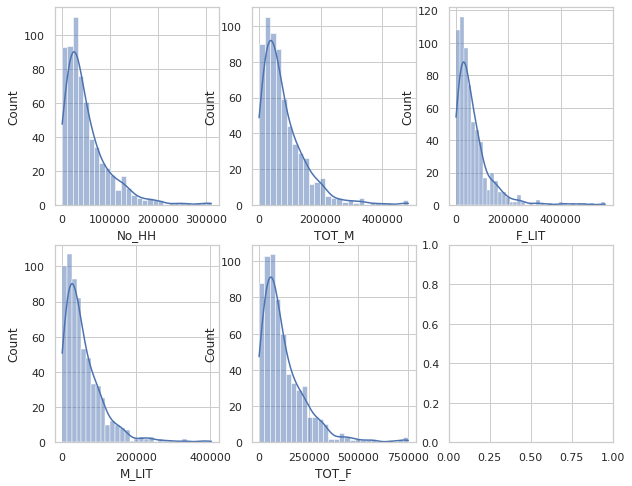

In [ ]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 3, figsize=(10, 8))
sns.histplot(data=df1, x="No_HH", kde=True,  ax=axs[0, 0])
sns.histplot(data=df1, x="TOT_M", kde=True,  ax=axs[0, 1])
sns.histplot(data=df1, x="TOT_F", kde=True,ax=axs[1, 1])
sns.histplot(data=df1, x="M_LIT", kde=True,  ax=axs[1, 0])
sns.histplot(data=df1, x="F_LIT", kde=True, ax=axs[0, 2]);

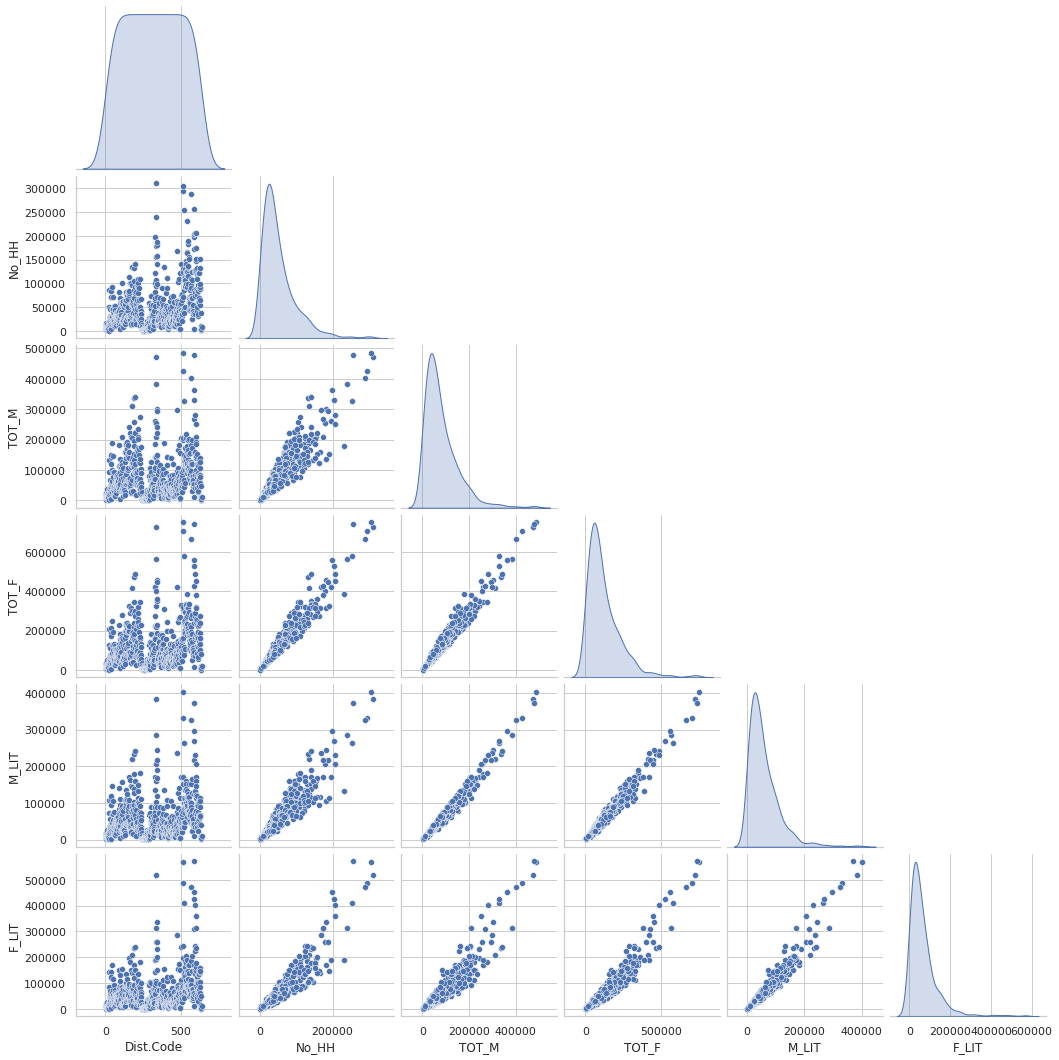

In [ ]:
sns.pairplot(df1, diag_kind="kde",corner=True)

In [ ]:
df1.corr()

,Dist.Code,No_HH,TOT_M,TOT_F,M_LIT,F_LIT
Dist.Code,1.000000,0.376971,0.164378,0.269653,0.208501,0.284111
No_HH,0.376971,1.000000,0.916170,0.970590,0.931938,0.928087
TOT_M,0.164378,0.916170,1.000000,0.982640,0.989312,0.931708
TOT_F,0.269653,0.970590,0.982640,1.000000,0.985441,0.957012
M_LIT,0.208501,0.931938,0.989312,0.985441,1.000000,0.967956
F_LIT,0.284111,0.928087,0.931708,0.957012,0.967956,1.000000


<Axes: >

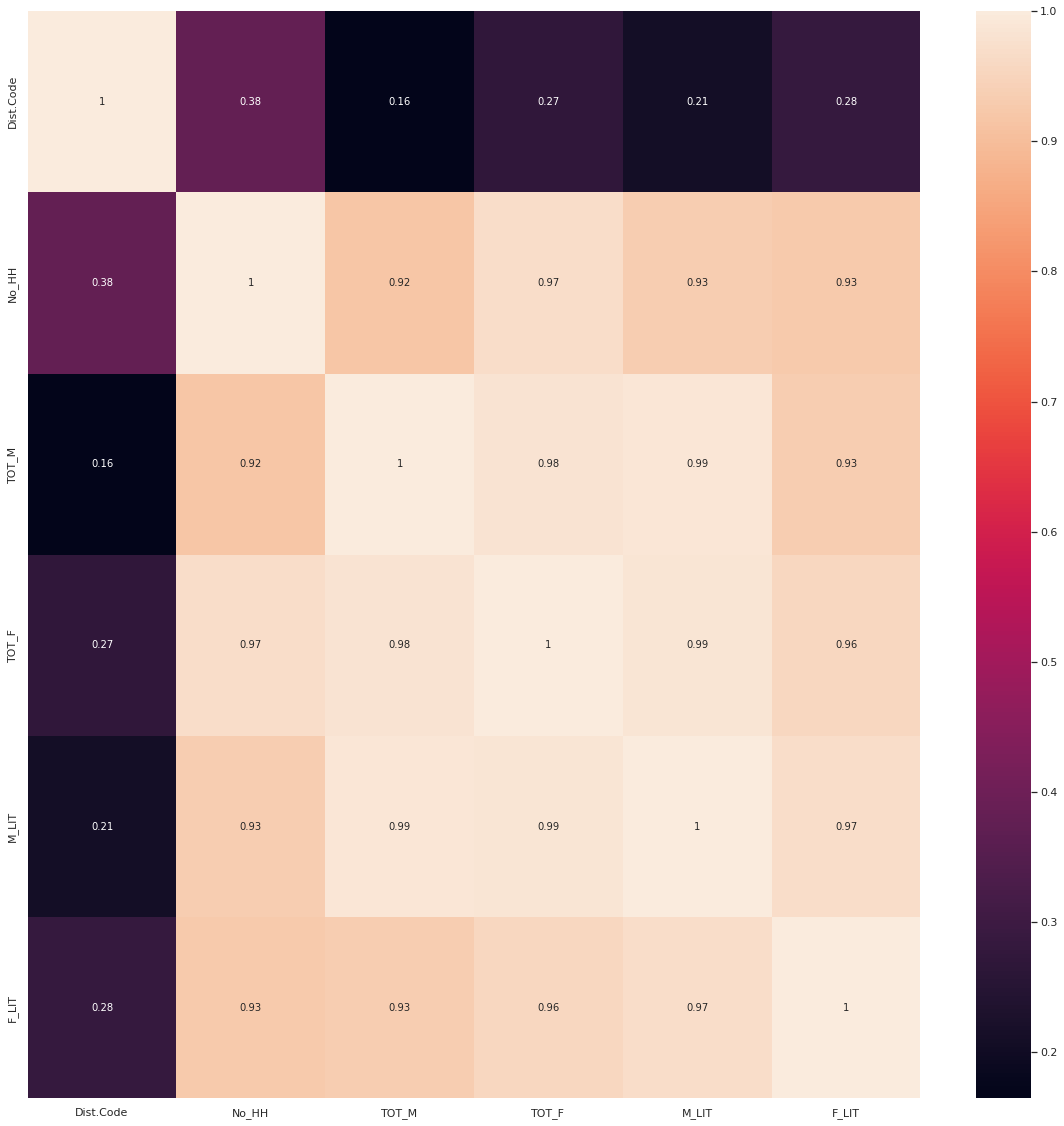

In [ ]:
#plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(), annot=True)

2.3 - We choose not to treat outliers for this case. Do you think that treating outliers for this case is necessary?


In the case of census data, outlier treatment may not be necessary for several reasons:

1.   The data is usually collected from a large and representative sample of the population. This means that the data is likely to be normally distributed, and outliers are less likely to occur
2. Census data is often collected using standardized methods and questionnaires, which reduce the likelihood of errors and outliers
3. The purpose of census data is often to provide an accurate representation of the population as a whole. Outliers, by definition, are not representative of the population and may not provide any useful information.
4. Outliers may also be due to errors or anomalies in the data collection process. In the case of census data, the data collection process is typically rigorous and standardized, making it less likely that errors will occur.






2.4 - Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment.


In [ ]:
##removing non-numericals
cols = ['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST', 'F_ST', 'M_LIT', 'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_M', 'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M', 'MAIN_AL_F', 'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F']
pca2 = df[cols]
pca2.head()


,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MAINWORK_M,MAINWORK_F,MAIN_CL_M,MAIN_CL_F,MAIN_AL_M,MAIN_AL_F,MAIN_HH_M,MAIN_HH_F,MAIN_OT_M,MAIN_OT_F
0,7707,23388,29796,5862,6196,3,0,1999,2598,13381,...,2763,1275,486,235,407,143,78,86,1792,811
1,6218,19585,23102,4482,3733,7,6,427,517,10513,...,4628,1733,1098,357,442,108,538,343,2550,925
2,4452,6546,10964,1082,1018,3,6,5806,9723,4534,...,1940,2923,519,1205,36,71,19,55,1366,1592
3,1320,2784,4206,563,677,0,0,2666,3968,1842,...,491,408,35,102,8,24,9,6,439,276
4,11654,20591,29981,5157,4587,20,33,7670,10843,13243,...,2523,2267,743,766,254,237,35,64,1491,1200


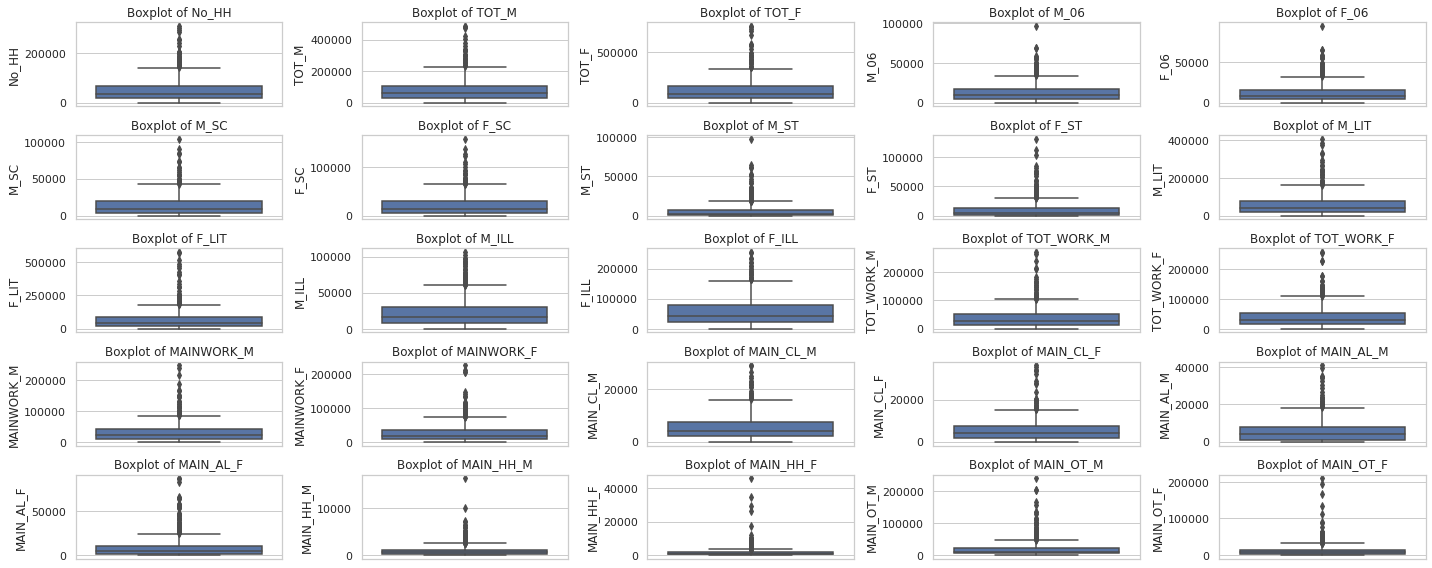

In [ ]:
#Check for presence of outliers in each feature before treatment
plt.figure(figsize = (20,8))
feature_list = pca2.columns
for i in range(len(feature_list)):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(y = pca2[feature_list[i]], data = pca2)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [ ]:
#Applying z-score
scaled_pca = pca2.apply(zscore)

In [ ]:
scaled_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
No_HH,640.0,4.440892e-17,1.000782,-1.057697,-0.659882,-0.319887,0.367358,5.389586
TOT_M,640.0,-8.881784e-17,1.000782,-1.084858,-0.677956,-0.294592,0.381549,5.529690
TOT_F,640.0,-4.440892e-17,1.000782,-1.071906,-0.668250,-0.305233,0.368945,5.532633
M_06,640.0,-5.551115e-17,1.000782,-1.066236,-0.659189,-0.274114,0.366445,7.301993
F_06,640.0,6.661338e-17,1.000782,-1.050264,-0.642376,-0.289756,0.349898,7.350309
M_SC,640.0,5.551115e-18,1.000782,-0.958783,-0.718323,-0.293404,0.389092,6.207800
F_SC,640.0,-5.551115e-17,1.000782,-0.957049,-0.698964,-0.325615,0.386976,6.248040
M_ST,640.0,-4.440892e-17,1.000782,-0.625124,-0.595467,-0.389534,0.148027,9.146281
F_ST,640.0,-2.220446e-17,1.000782,-0.640197,-0.613122,-0.398476,0.146540,7.562324
M_LIT,640.0,-4.440892e-17,1.000782,-1.032495,-0.656385,-0.273410,0.358381,6.180672


In [ ]:
scaled_pca

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MAINWORK_M,MAINWORK_F,MAIN_CL_M,MAIN_CL_F,MAIN_AL_M,MAIN_AL_F,MAIN_HH_M,MAIN_HH_F,MAIN_OT_M,MAIN_OT_F
0,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,-0.476423,-0.798097,...,-0.872367,-0.898216,-1.042844,-0.986630,-0.851060,-0.683276,-0.630766,-0.407555,-0.624042,-0.611637
1,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,-0.607607,-0.849434,...,-0.813078,-0.882936,-0.913606,-0.963707,-0.845587,-0.685999,-0.270728,-0.326659,-0.594942,-0.605624
2,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,-0.027273,-0.956457,...,-0.898530,-0.843236,-1.035875,-0.804375,-0.909079,-0.688878,-0.676945,-0.417313,-0.640396,-0.570440
3,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,-0.390060,-1.004643,...,-0.944594,-0.927140,-1.138083,-1.011620,-0.913457,-0.692534,-0.684772,-0.432737,-0.675984,-0.639858
4,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,0.043330,-0.800568,...,-0.879997,-0.865121,-0.988572,-0.886859,-0.874987,-0.675964,-0.664422,-0.414480,-0.635597,-0.591118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,-0.995677,-0.978990,-0.974268,-0.971387,-0.948916,-0.957326,-0.955667,-0.625124,-0.640197,-0.913820,...,-0.850241,-0.907490,-1.143784,-1.030221,-0.910486,-0.694012,-0.679293,-0.433681,-0.562003,-0.602406
636,-0.844340,-0.921822,-0.886965,-0.936754,-0.919757,-0.803806,-0.765670,-0.625124,-0.640197,-0.853390,...,-0.781574,-0.803836,-1.117599,-1.010492,-0.813841,-0.624152,-0.672249,-0.380170,-0.507910,-0.500388
637,-1.038465,-1.069066,-1.054885,-1.051356,-1.035331,-0.958783,-0.957049,-0.522953,-0.529880,-1.016367,...,-0.949871,-0.922936,-1.143784,-1.029282,-0.914552,-0.694323,-0.679293,-0.422664,-0.681320,-0.628728
638,-0.986758,-1.019276,-1.007472,-1.008195,-0.996541,-0.958783,-0.957049,-0.622297,-0.637046,-0.962328,...,-0.893507,-0.885171,-1.028695,-0.988509,-0.904856,-0.692223,-0.685554,-0.432422,-0.636250,-0.580251


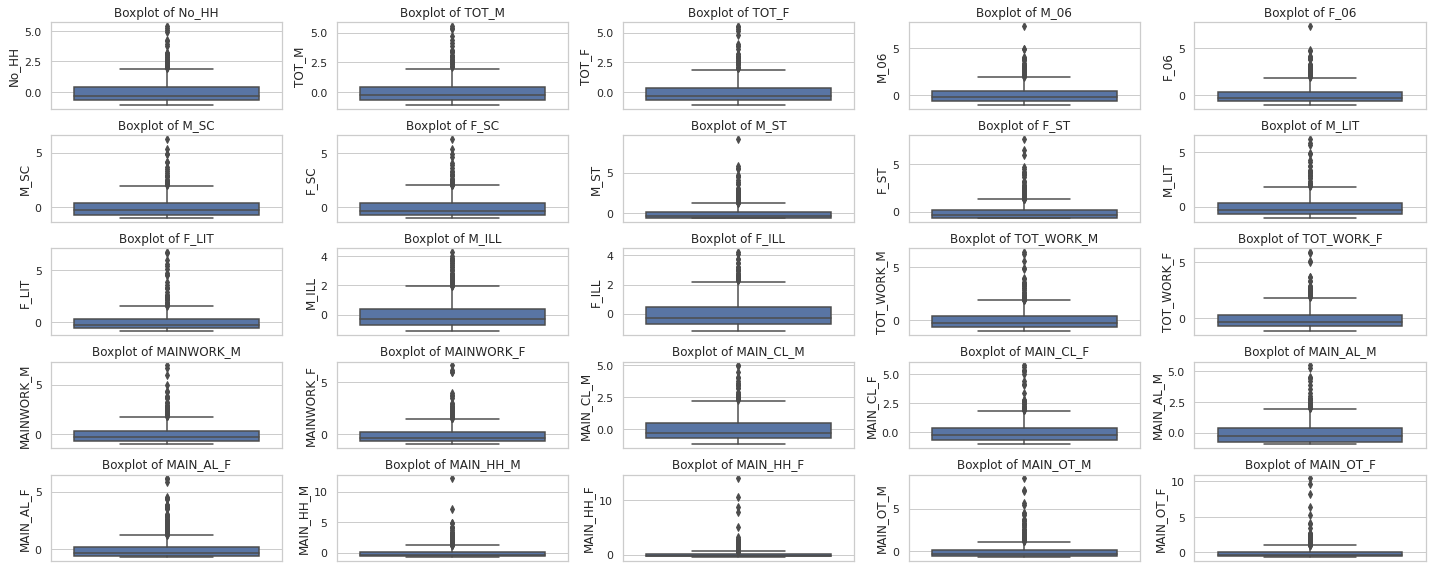

In [ ]:
#Check for presence of outliers in each feature after treatment
plt.figure(figsize = (20,8))
feature_list = scaled_pca.columns
for i in range(len(feature_list)):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(y = scaled_pca[feature_list[i]], data = scaled_pca)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

Thus we can see from above that scaling has no impact on Outliers

2.5 - Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector.


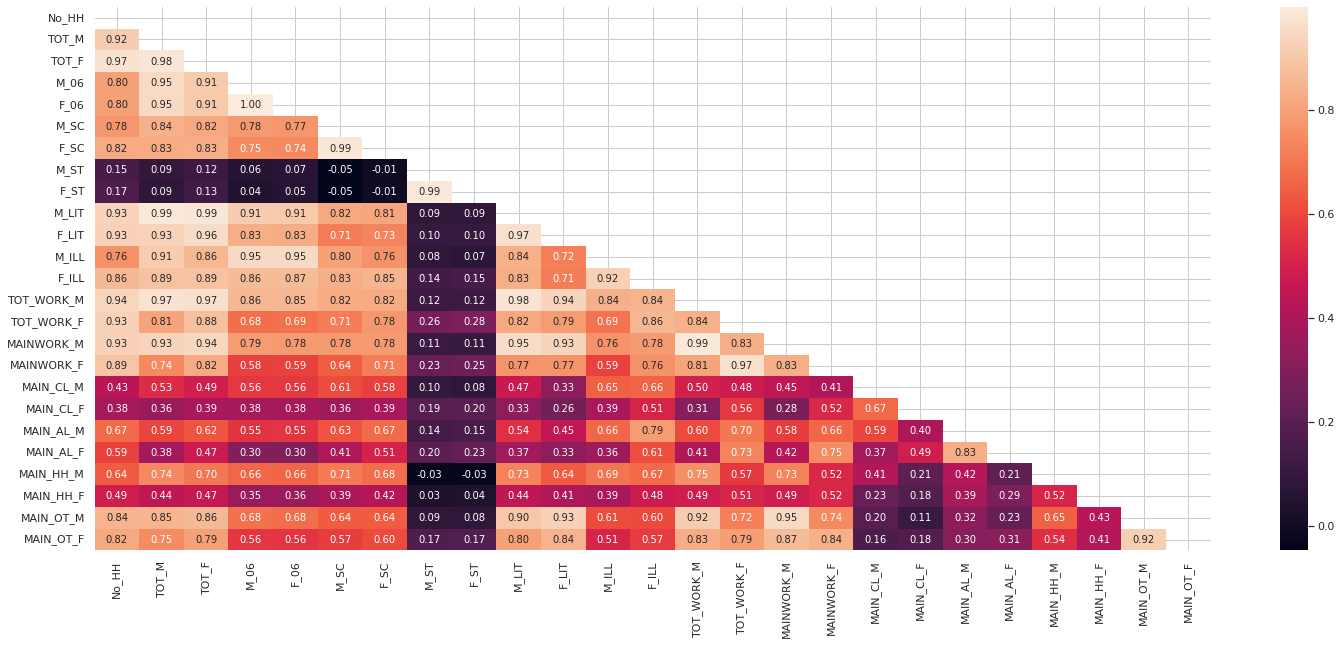

In [ ]:
#Check for presence of correlations
plt.figure(figsize = (25,10))
mask = np.triu(np.ones_like(scaled_pca.corr()))
sns.heatmap(scaled_pca.corr(), annot=True, mask = mask, fmt='.2f');

In [ ]:
!pip install factor_analyzer


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant,
#H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(scaled_pca)
p_value

/usr/local/lib/python3.9/dist-packages/factor_analyzer/factor_analyzer.py:108: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


nan

In [ ]:
#Confirm the adequacy of sample size.
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(scaled_pca)
kmo_model


/usr/local/lib/python3.9/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.7502540295444671

Above 0.7 is good, below 0.5 is not acceptable

In [ ]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=12, random_state=123)
pca_transformed = pca.fit_transform(scaled_pca)


In [ ]:
#Extract eigen vectors
pca.components_


array([[ 2.38709793e-01,  2.41900082e-01,  2.44573206e-01,
         2.20937829e-01,  2.20547952e-01,  2.14817474e-01,
         2.17988628e-01,  3.51272864e-02,  3.56584288e-02,
         2.40051149e-01,  2.25970766e-01,  2.18424186e-01,
         2.29798146e-01,  2.41797250e-01,  2.25614542e-01,
         2.35359144e-01,  2.13711260e-01,  1.42611235e-01,
         1.10946487e-01,  1.72790685e-01,  1.34034463e-01,
         1.84217020e-01,  1.28232746e-01,  2.06845216e-01,
         1.94392948e-01],
       [ 1.62290697e-02, -9.40391173e-02, -4.63346143e-02,
        -1.00523300e-01, -9.33814815e-02, -8.22317092e-02,
        -3.24130673e-02,  4.78461556e-01,  4.88306682e-01,
        -1.09986449e-01, -1.25864235e-01, -3.79126499e-02,
         8.87357981e-02, -7.90420705e-02,  1.77987002e-01,
        -8.16965531e-02,  1.67367642e-01,  1.70396692e-01,
         3.19063353e-01,  2.40585193e-01,  3.63978211e-01,
        -1.61006580e-01, -3.99156365e-03, -1.80799828e-01,
        -7.10691453e-02],
    

In [ ]:
#Check the eigen values
pca.explained_variance_


array([16.21075146,  2.42307151,  2.005783  ,  1.3444504 ,  0.82011656,
        0.72051381,  0.50566632,  0.30728878,  0.30151323,  0.16697367,
        0.07479658,  0.06118332])

2.6 - Identify the optimum number of PCs (for this project, take at least 90% explained variance). Show Scree plot.

In [ ]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_


array([0.64741689, 0.09677142, 0.08010596, 0.05369399, 0.03275341,
       0.02877552, 0.02019505, 0.01227235, 0.01204168, 0.00666851,
       0.00298719, 0.00244351])

The Optimum number of PCs for 90 % vairance is 5


In [ ]:
#Create a dataframe containing the loadings or coefficients of all PCs
pca_extracted_loadings = pd.DataFrame(pca.components_.T,
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12'],
                                    index = scaled_pca.columns)

In [ ]:
pca_extracted_loadings


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
No_HH,0.238710,0.016229,0.087665,-0.118008,-0.087639,-0.062146,0.067966,-0.064370,-0.007649,-0.142144,0.468119,0.326276
TOT_M,0.241900,-0.094039,0.013362,0.132281,-0.031168,-0.031487,0.087161,0.010107,-0.006939,-0.038717,-0.049450,-0.030718
TOT_F,0.244573,-0.046335,0.053234,0.032890,-0.075190,-0.029472,0.112553,-0.051836,0.019330,-0.117650,0.224823,0.059948
M_06,0.220938,-0.100523,-0.096453,0.284973,-0.049231,-0.061910,0.284863,-0.099900,0.074713,-0.022535,-0.090888,-0.267719
F_06,0.220548,-0.093381,-0.095283,0.288518,-0.042719,-0.065178,0.299099,-0.094615,0.078768,0.005639,-0.057843,-0.253380
M_SC,0.214817,-0.082232,-0.176883,0.026797,0.034196,-0.079154,-0.476370,-0.394287,-0.008849,-0.027020,-0.228868,-0.069726
F_SC,0.217989,-0.032413,-0.155444,-0.061835,0.010426,-0.100184,-0.450805,-0.448553,0.024465,-0.102647,0.014754,0.000206
M_ST,0.035127,0.478462,0.349090,0.335599,0.139878,-0.062813,-0.104478,-0.038151,-0.016227,-0.046589,-0.105820,-0.065723
F_ST,0.035658,0.488307,0.350657,0.306505,0.132026,-0.075818,-0.097527,-0.062795,0.033896,-0.044593,0.064337,0.037823
M_LIT,0.240051,-0.109986,0.077671,0.081142,-0.069521,0.006839,0.054339,-0.005492,-0.025422,-0.203075,0.012511,-0.082584


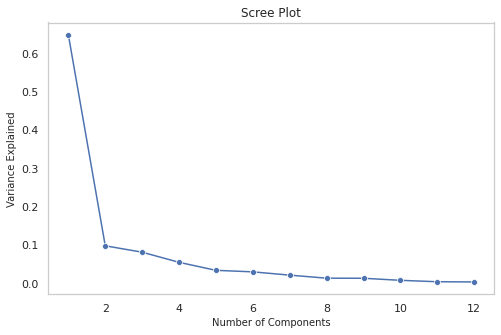

In [ ]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,13),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()


In [ ]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)


array([0.64741689, 0.74418831, 0.82429426, 0.87798825, 0.91074166,
       0.93951718, 0.95971223, 0.97198457, 0.98402626, 0.99069477,
       0.99368196, 0.99612546])

In [ ]:
#Choose the PCs basis cumulative explained variance
pca_selected = pca_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5']]


In [ ]:
#Check the selected PCs
pca_selected

,PC1,PC2,PC3,PC4,PC5
No_HH,0.238710,0.016229,0.087665,-0.118008,-0.087639
TOT_M,0.241900,-0.094039,0.013362,0.132281,-0.031168
TOT_F,0.244573,-0.046335,0.053234,0.032890,-0.075190
M_06,0.220938,-0.100523,-0.096453,0.284973,-0.049231
F_06,0.220548,-0.093381,-0.095283,0.288518,-0.042719
M_SC,0.214817,-0.082232,-0.176883,0.026797,0.034196
F_SC,0.217989,-0.032413,-0.155444,-0.061835,0.010426
M_ST,0.035127,0.478462,0.349090,0.335599,0.139878
F_ST,0.035658,0.488307,0.350657,0.306505,0.132026
M_LIT,0.240051,-0.109986,0.077671,0.081142,-0.069521


2.7 - PCA: Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables.


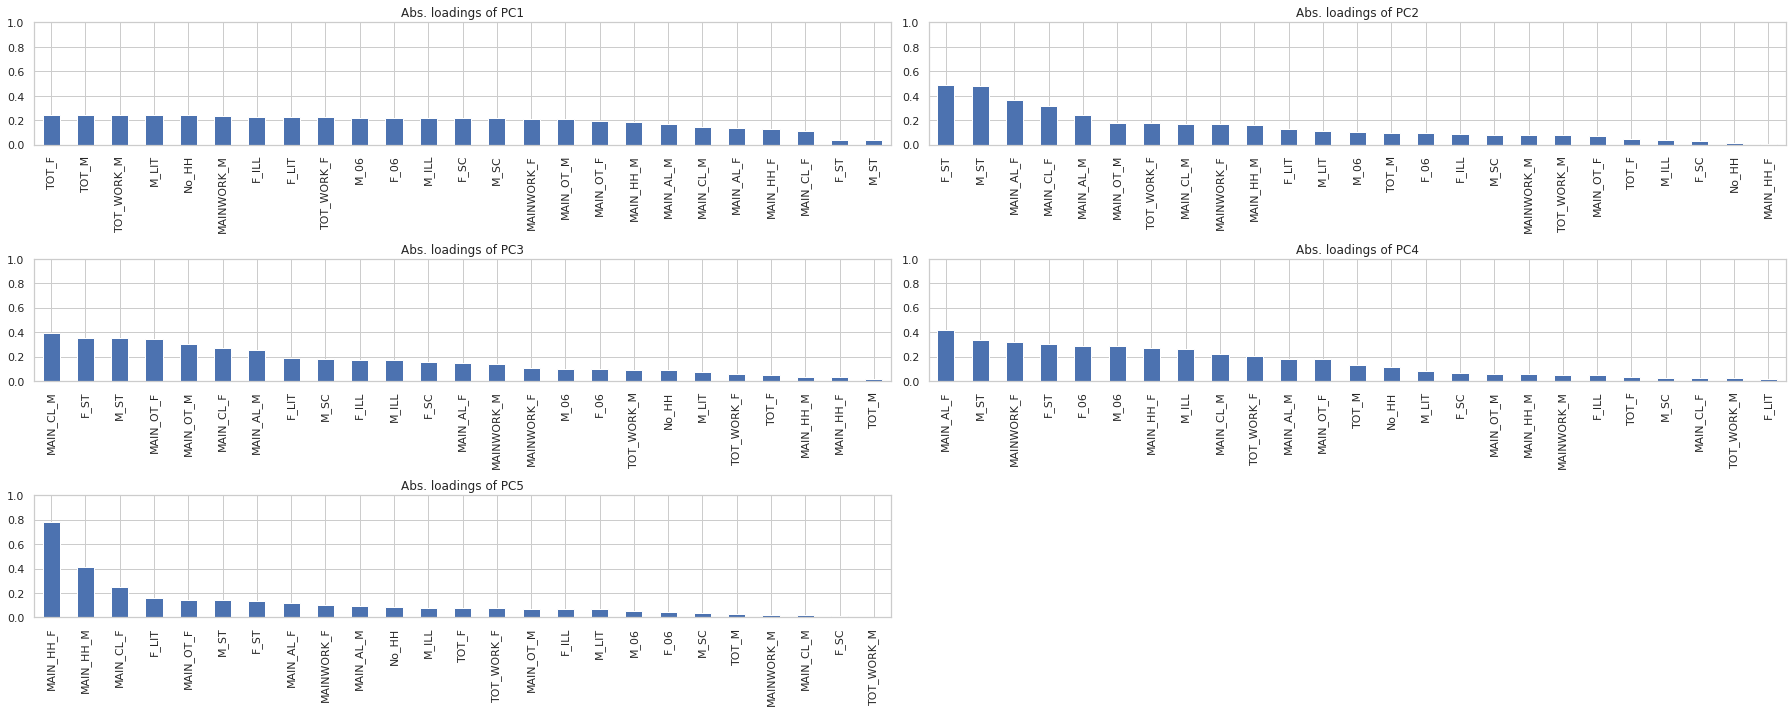

In [ ]:
#Checking as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (25,10))
for i in range(len(pca_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(pca_selected[pca_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(pca_selected.columns[i]))
    plt.tight_layout()

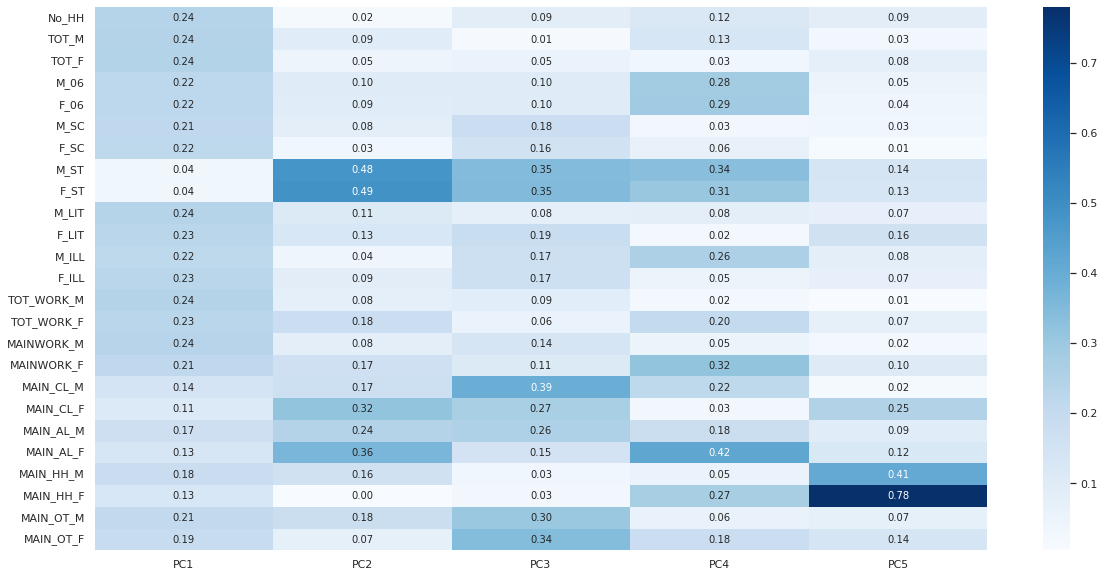

In [ ]:
#Comparing how the original features influence various PCs
plt.figure(figsize = (20,10))
sns.heatmap(abs(pca_selected), annot = True, cmap = 'Blues',fmt = '.2f');


In [ ]:
#In order to calculate PC scores we need loadings, below:
pca_selected

,PC1,PC2,PC3,PC4,PC5
No_HH,0.238710,0.016229,0.087665,-0.118008,-0.087639
TOT_M,0.241900,-0.094039,0.013362,0.132281,-0.031168
TOT_F,0.244573,-0.046335,0.053234,0.032890,-0.075190
M_06,0.220938,-0.100523,-0.096453,0.284973,-0.049231
F_06,0.220548,-0.093381,-0.095283,0.288518,-0.042719
M_SC,0.214817,-0.082232,-0.176883,0.026797,0.034196
F_SC,0.217989,-0.032413,-0.155444,-0.061835,0.010426
M_ST,0.035127,0.478462,0.349090,0.335599,0.139878
F_ST,0.035658,0.488307,0.350657,0.306505,0.132026
M_LIT,0.240051,-0.109986,0.077671,0.081142,-0.069521


In [ ]:
#original scaled features
scaled_pca.iloc[0]


No_HH        -0.904738
TOT_M        -0.771236
TOT_F        -0.815563
M_06         -0.561012
F_06         -0.507738
M_SC         -0.958575
F_SC         -0.957049
M_ST         -0.423306
F_ST         -0.476423
M_LIT        -0.798097
F_LIT        -0.733477
M_ILL        -0.604015
F_ILL        -0.798229
TOT_WORK_M   -0.859260
TOT_WORK_F   -1.010238
MAINWORK_M   -0.872367
MAINWORK_F   -0.898216
MAIN_CL_M    -1.042844
MAIN_CL_F    -0.986630
MAIN_AL_M    -0.851060
MAIN_AL_F    -0.683276
MAIN_HH_M    -0.630766
MAIN_HH_F    -0.407555
MAIN_OT_M    -0.624042
MAIN_OT_F    -0.611637
Name: 0, dtype: float64

In [ ]:
#Extract the required(as per the cumulative explained variance) number of PCs to obtain the scores

pca = PCA(n_components=5, random_state=123)
pca_final = pca.fit_transform(scaled_pca)


In [ ]:
#creating a dataframe out of fit_transformed scaled data above
pca_final1 = pd.DataFrame(pca_final, columns = pca_selected.columns)
pca_final1.head(10)


,PC1,PC2,PC3,PC4,PC5
0,-3.703249,-0.871143,0.264883,0.066007,0.077948
1,-3.743989,-0.999495,0.150749,-0.136711,0.266060
2,-4.195509,-0.262519,0.681470,-0.089794,0.138131
3,-4.453932,-0.666312,0.484908,-0.311453,0.127225
4,-3.698444,-0.249803,0.674850,0.288512,0.152415
5,-3.330332,-0.194388,0.563343,0.339252,0.088958
6,-3.504439,-0.910548,0.167269,-0.195459,-0.019114
7,-3.665087,-0.937932,0.256662,-0.136866,0.098692
8,-4.099003,-0.818407,0.348720,-0.284005,0.276406
9,-2.950464,-1.286714,0.569839,-0.152651,0.066231


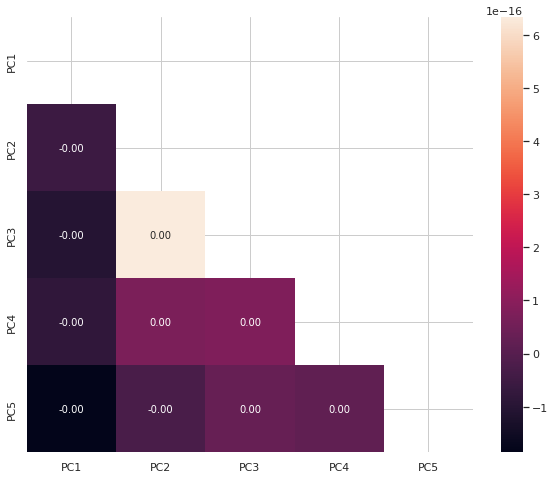

In [ ]:
#Check for presence of correlations among the PCs
plt.figure(figsize = (10,8))
mask = np.triu(np.ones_like(pca_final1.corr()))
sns.heatmap(pca_final1.corr(), annot=True,mask=mask,fmt='.2f');



2.8 - Write linear equation for first PC.


In [ ]:
#Loading the dataset in X
X = pca2

In [ ]:
# Initialize the PCA algorithm with 5 principal components
pca = PCA(n_components=5)

In [ ]:
# Fit the PCA model to the data
pca.fit(X)

PCA(n_components=5)

In [ ]:
# Get the coefficients of the first principal component
coefficients = pca.components_[0]

In [ ]:
# Writing the linear equation for the first PC
equation = "PC1 = "
for i, coef in enumerate(coefficients):
    equation += f"{coef:.3f} * x{i+1} + "
equation = equation[:-3]  # Remove the trailing " + "
print(equation)

PC1 = 0.246 * x1 + 0.381 * x2 + 0.599 * x3 + 0.055 * x4 + 0.054 * x5 + 0.063 * x6 + 0.096 * x7 + 0.007 * x8 + 0.011 * x9 + 0.292 * x10 + 0.380 * x11 + 0.089 * x12 + 0.218 * x13 + 0.188 * x14 + 0.172 * x15 + 0.159 * x16 + 0.132 * x17 + 0.012 * x18 + 0.011 * x19 + 0.021 * x20 + 0.032 * x21 + 0.005 * x22 + 0.008 * x23 + 0.121 * x24 + 0.081 * x25
